In [1]:
import numpy as np
import matplotlib.pyplot as plt

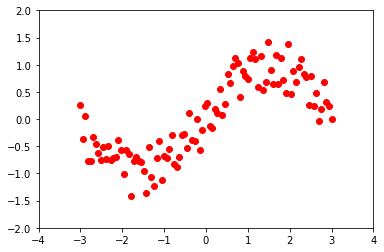

In [2]:
#Getting the dataset
points=100
X=np.linspace(-3,3,points)
np.random.seed(6)
y=np.sin(X)+np.random.uniform(-0.5,0.5,points)

p=plt.plot(X,y,'ro')
plt.axis([-4,4,-2.0,2.0])
plt.show()

In [3]:
X.shape

(100,)

In [4]:
X2=np.c_[np.ones(len(X)),X] #this concatenates 1 to all X values ex:[1,-3],[1,-2.87],etc... 
print(X2.shape)
W=np.random.uniform(size=X2.shape[1],)
print(W)

(100, 2)
[0.82815669 0.27635046]


In [5]:
def predict():
    return X2.dot(W)

In [6]:
predictedY=predict()
print(predictedY[:5]) #first 5 predicted values printing

[-0.00089469  0.01585382  0.03260233  0.04935084  0.06609936]


In [7]:
def GD(lrate,epochs):
    total_expected_error=0
    errorlist=[]
    finalepoch=0
    for i in range(epochs):
        global W
        
        predictedY=predict() 
        error=(predictedY-y)**2
        total_error=np.sum(error)
        
        gradient=X2.T.dot(error)/X2.shape[0] # d/dϴ =error*x.T (transpose to get a vector as result from matrix multiplication)
                                           #X.shape[0]=size of X (m in GD equation)
        if i%100==0:
            errorlist.append(total_error)
            finalepoch+=1

            
        if np.abs(total_expected_error-total_error)< 0.0005: #to break when we reach the minimum or avoid overshooting weights
            return errorlist,finalepoch
        total_expected_error=total_error
        
        W+=-lrate*gradient #new weight=old weight-alpha*change weight
    return errorlist,finalepoch

the errors are 
[86.85200943516935, 74.41902760347462, 64.82332707237119, 57.24152327858896, 51.14659639255236, 46.180078458032085, 42.08854561411706, 38.68786589200809, 35.84141349646876, 33.446085187542934, 31.42299120731768, 29.71108662269308, 28.262720357808924, 27.04047165292189, 26.014872825496816, 25.162756950101702, 24.466057486292424, 23.91094487203704, 23.48722480981316, 23.187951916008316, 23.009235678571798]


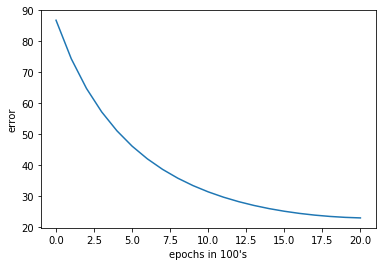

In [8]:
total_error,finalepoch=GD(0.001,5000)

#plotting 
print("the errors are ")
print(total_error)
plt.plot(range(finalepoch),total_error)
plt.xlabel("epochs in 100's")
plt.ylabel("error")
plt.show()

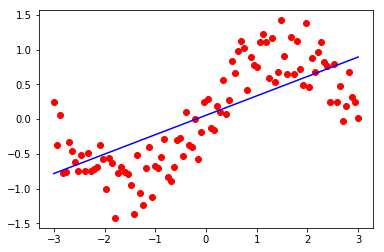

In [9]:
plt.plot(X,y,'ro')
plt.plot(X,predict(),'b')#prediction y values (blue line)
plt.show()

In [10]:
#TENSORFLOW CODE FOR THE ABOVE SCRATCH CODE
import tensorflow as tf

x = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
tf.set_random_seed(5)
w = tf.Variable(tf.random_normal([1]),name="weights")
b = tf.Variable(tf.random_normal([1]), name='bias')

Y_Pred = tf.add(tf.multiply(x, w), b) # same as ϴ1*X + ϴ0

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
error=tf.square(Y_Pred-Y)
f_error=tf.reduce_sum(error)/(points-1) #we just reduced error by dividing the no of X values (Good practice)

In [12]:
optimizer=tf.train.GradientDescentOptimizer(0.01).minimize(f_error)

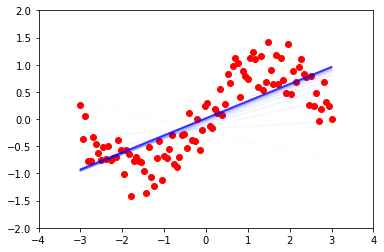

In [13]:
# %% We create a session to use the graph
epochs=1000
plt.plot(X,y,'ro')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Fit all training data
    
    loss_expected=0
    for epoch in range(epochs):
        
        for (x_point,y_point) in zip(X,y):
            sess.run(optimizer,{x:x_point,Y:y_point})
        
        loss_per_epoch = sess.run(f_error,{x:X,Y:y}) 
        # for testing we give the same training set as the test set
           
        if epoch % 10 == 0:
            plt.axis([-4,4,-2.0,2.0])
            plt.plot(X,Y_Pred.eval(feed_dict={x: X}, session=sess),
                     'b', alpha=epoch / epochs)

        # Allow the training to quit if we've reached a minimum
        if np.abs(loss_expected - loss_per_epoch) < 0.000001:
            break
        loss_expected = loss_per_epoch
        
plt.show()

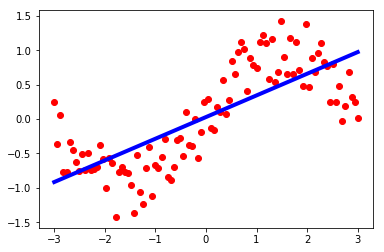

In [14]:
#SCIKIT LEARN IMPLEMENTATION
from sklearn import linear_model

lr=linear_model.LinearRegression()
lr.fit(X2, y)

#ploting the points
plt.scatter(X,y,color='red')
#drawing a line
plt.plot(X,lr.predict(X2),color='blue',linewidth=4)
plt.show()